In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np 
import matplotlib.pyplot as plt

In [14]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, ))

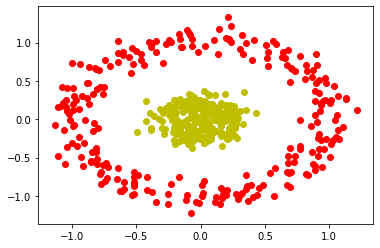

In [34]:
def plot_data():
    plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='y')
    
plot_data()

In [16]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
         
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [17]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [21]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

In [22]:
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(torch.Tensor(X))
    loss = criterion(y_pred, torch.Tensor(y))
    print("epoch: ", i, "loss: ", loss.item())
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0 loss:  0.03219418227672577
epoch:  1 loss:  0.031338438391685486
epoch:  2 loss:  0.03052464872598648
epoch:  3 loss:  0.029726121574640274
epoch:  4 loss:  0.02895858883857727
epoch:  5 loss:  0.02821318618953228
epoch:  6 loss:  0.02749370038509369
epoch:  7 loss:  0.026791995391249657
epoch:  8 loss:  0.026111198589205742
epoch:  9 loss:  0.025453610345721245
epoch:  10 loss:  0.02481699548661709
epoch:  11 loss:  0.02420056238770485
epoch:  12 loss:  0.023605074733495712
epoch:  13 loss:  0.023029116913676262
epoch:  14 loss:  0.022471319884061813
epoch:  15 loss:  0.021932024508714676
epoch:  16 loss:  0.021410752087831497
epoch:  17 loss:  0.020906277000904083
epoch:  18 loss:  0.020418565720319748
epoch:  19 loss:  0.019947491586208344
epoch:  20 loss:  0.01949196308851242
epoch:  21 loss:  0.01905113086104393
epoch:  22 loss:  0.01862478069961071
epoch:  23 loss:  0.018212536349892616
epoch:  24 loss:  0.017813747748732567
epoch:  25 loss:  0.017428018152713776
epoch:

epoch:  294 loss:  0.0013986442936584353
epoch:  295 loss:  0.0013918925542384386
epoch:  296 loss:  0.0013851934345439076
epoch:  297 loss:  0.001378535758703947
epoch:  298 loss:  0.0013719301205128431
epoch:  299 loss:  0.0013653652276843786
epoch:  300 loss:  0.0013588509755209088
epoch:  301 loss:  0.0013523837551474571
epoch:  302 loss:  0.001345960539765656
epoch:  303 loss:  0.0013395785354077816
epoch:  304 loss:  0.0013332425151020288
epoch:  305 loss:  0.0013269492192193866
epoch:  306 loss:  0.0013206996954977512
epoch:  307 loss:  0.0013144941767677665
epoch:  308 loss:  0.0013083277735859156
epoch:  309 loss:  0.0013022040948271751
epoch:  310 loss:  0.001296119880862534
epoch:  311 loss:  0.0012900758301839232
epoch:  312 loss:  0.001284074503928423
epoch:  313 loss:  0.001278112642467022
epoch:  314 loss:  0.0012721868697553873
epoch:  315 loss:  0.0012663016095757484
epoch:  316 loss:  0.0012604543007910252
epoch:  317 loss:  0.0012546447105705738
epoch:  318 loss:  0.

epoch:  593 loss:  0.00046045382623560727
epoch:  594 loss:  0.00045917622628621757
epoch:  595 loss:  0.0004579101223498583
epoch:  596 loss:  0.0004566467250697315
epoch:  597 loss:  0.0004553931939881295
epoch:  598 loss:  0.00045414367923513055
epoch:  599 loss:  0.00045290146954357624
epoch:  600 loss:  0.0004516680783126503
epoch:  601 loss:  0.0004504386452026665
epoch:  602 loss:  0.00044921462540514767
epoch:  603 loss:  0.0004480007046367973
epoch:  604 loss:  0.00044679109123535454
epoch:  605 loss:  0.0004455861053429544
epoch:  606 loss:  0.000444392382632941
epoch:  607 loss:  0.0004432014829944819
epoch:  608 loss:  0.0004420151235535741
epoch:  609 loss:  0.0004408368840813637
epoch:  610 loss:  0.00043966658995486796
epoch:  611 loss:  0.00043849815847352147
epoch:  612 loss:  0.0004373379051685333
epoch:  613 loss:  0.00043618358904495835
epoch:  614 loss:  0.0004350346280261874
epoch:  615 loss:  0.00043389195343479514
epoch:  616 loss:  0.0004327541682869196
epoch: 

epoch:  893 loss:  0.00022671806800644845
epoch:  894 loss:  0.00022627797443419695
epoch:  895 loss:  0.00022584269754588604
epoch:  896 loss:  0.00022540598001796752
epoch:  897 loss:  0.00022497439931612462
epoch:  898 loss:  0.00022454372083302587
epoch:  899 loss:  0.0002241163165308535
epoch:  900 loss:  0.0002236888831248507
epoch:  901 loss:  0.00022326430189423263
epoch:  902 loss:  0.0002228415251011029
epoch:  903 loss:  0.00022241793340072036
epoch:  904 loss:  0.00022199680097401142
epoch:  905 loss:  0.00022158252249937505
epoch:  906 loss:  0.00022116654145065695
epoch:  907 loss:  0.00022074948356021196
epoch:  908 loss:  0.00022033682034816593
epoch:  909 loss:  0.0002199278969783336
epoch:  910 loss:  0.00021951657254248857
epoch:  911 loss:  0.00021911016665399075
epoch:  912 loss:  0.00021870250930078328
epoch:  913 loss:  0.00021829824254382402
epoch:  914 loss:  0.00021789490710943937
epoch:  915 loss:  0.0002174953988287598
epoch:  916 loss:  0.000217092645470984

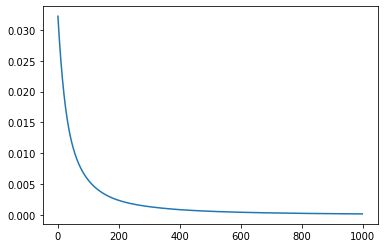

In [23]:
# Loss plot
plt.plot(np.arange(0, epochs), losses)

In [37]:
def plot_dicision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0])-0.25, max(X[:, 0]))
    y_span = np.linspace(min(X[:, 1])-0.25, max(X[:, 1]))
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)

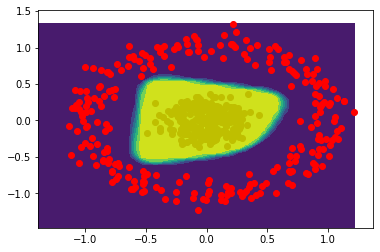

In [38]:

plot_dicision_boundary(X, y)
plot_data()

In [39]:
# Pred
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
model.predict(point)

1